# Step 1 import lib ,unzip and read file

In [2]:
!pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import butter, lfilter
from scipy.fft import fft, fftfreq

In [2]:
!unzip '/content/clean_datasets.zip'

Archive:  /content/clean_datasets.zip
   creating: clean_datasets/
   creating: clean_datasets/hand/
  inflating: clean_datasets/hand/climbing_stairs.csv  
  inflating: clean_datasets/hand/descending_stairs.csv  
  inflating: clean_datasets/hand/running.csv  
  inflating: clean_datasets/hand/sitting_standing_transition.csv  
  inflating: clean_datasets/hand/walking.csv  
   creating: clean_datasets/pocket/
  inflating: clean_datasets/pocket/climbing_stairs.csv  
  inflating: clean_datasets/pocket/descending_stairs.csv  
  inflating: clean_datasets/pocket/running.csv  
  inflating: clean_datasets/pocket/sitting_standing_transition.csv  
  inflating: clean_datasets/pocket/walking.csv  


In [2]:
!unzip '/content/spectro_patronum.zip' -d "/content/train/"
!unzip '/content/spectro_patronum.zip' -d "/content/test/"

Archive:  /content/spectro_patronum.zip
   creating: /content/train/spectro_patronum/
  inflating: /content/train/spectro_patronum/class1_climbing_backpack.npy  
  inflating: /content/train/spectro_patronum/class1_climbing_hand.npy  
  inflating: /content/train/spectro_patronum/class1_climbing_leg.npy  
  inflating: /content/train/spectro_patronum/class1_climbing_shirtdown.npy  
  inflating: /content/train/spectro_patronum/class1_climbing_shirtup.npy  
  inflating: /content/train/spectro_patronum/class2_descending_backpack.npy  
  inflating: /content/train/spectro_patronum/class2_descending_hand.npy  
  inflating: /content/train/spectro_patronum/class2_descending_leg.npy  
  inflating: /content/train/spectro_patronum/class2_descending_shirtdown.npy  
  inflating: /content/train/spectro_patronum/class2_descending_shirtup.npy  
  inflating: /content/train/spectro_patronum/class3_nothing1_backpack.npy  
  inflating: /content/train/spectro_patronum/class3_nothing1_hand.npy  
  inflating: /

In [8]:
climbing = pd.read_csv('/content/clean_datasets/pocket/climbing_stairs.csv')
descending = pd.read_csv('/content/clean_datasets/pocket/descending_stairs.csv')
# nothing1 = pd.read_csv('/content/clean_datasets/hand/running.csv')
# nothing2 = pd.read_csv('/content/cleaned_data_many_position/shirt-pocket-up/nothing2.csv')
running = pd.read_csv('/content/clean_datasets/pocket/running.csv')
sitting = pd.read_csv('/content/clean_datasets/pocket/sitting_standing_transition.csv')
walking = pd.read_csv('/content/clean_datasets/pocket/walking.csv')

# Step 2 combine x, y, z (Calculate magnitude) and strip

In [ ]:
data = running.copy()

In [ ]:
# Combine x, y, z
def calculate_magnitude(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)

x = np.array(data['x'].values)
y = np.array(data['y'].values)
z = np.array(data['z'].values)

magnitude = calculate_magnitude(x, y, z)
print(magnitude)
# data['magnitude'] = magnitude


[8.71370185 8.78806577 8.97065215 ... 9.39149083 9.70721896 9.59297139]


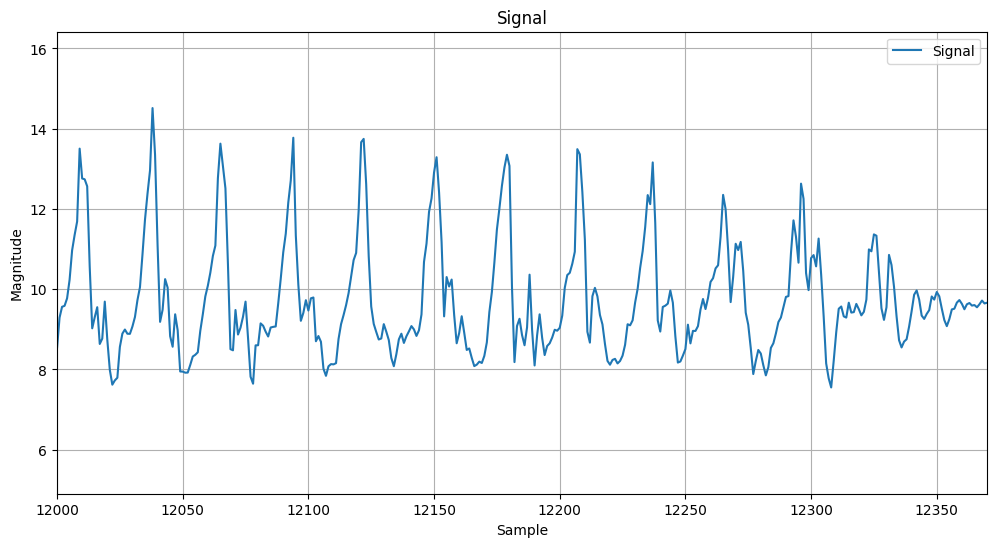

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['magnitude'], label='Signal')
plt.xlabel('Sample')
plt.ylabel('Magnitude')
plt.title('Signal')
plt.legend()
plt.xlim(12000,12370)
plt.grid(True)
plt.show()

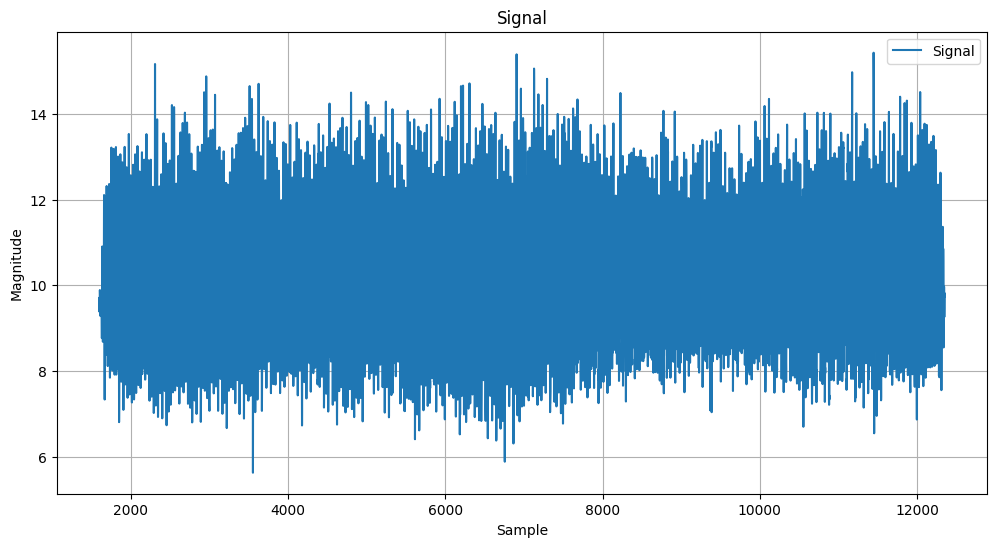

In [ ]:
new_data = data[1600:12350]
plt.figure(figsize=(12, 6))
plt.plot(new_data['magnitude'], label='Signal')
plt.xlabel('Sample')
plt.ylabel('Magnitude')
plt.title('Signal')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# ['climbing_stairs.csv','descending_stairs.csv','running.csv','sitting_standing_transition.csv','walking.csv','nothing1.csv','nothing2.csv']

In [ ]:
new_data.to_csv('walking.csv', index=False)

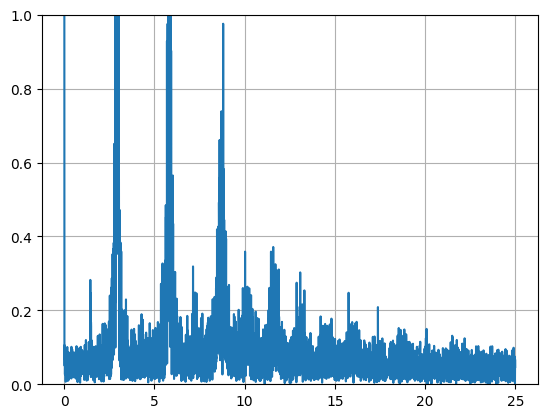

In [ ]:
import numpy as np
from scipy.fft import fft, fftfreq
# Number of sample points
N = len(magnitude)
# sample spacing
T = 1.0 / 50
yf = fft(magnitude)
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.ylim(0,1)
plt.grid()
plt.show()


# Step 3  Clean Noise and remove gravity

In [ ]:
from scipy.signal import butter, lfilter

In [ ]:
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

fs = 50  # Sampling frequency
lowcut = 0.4  # Lower cutoff frequency (Hz)
highcut = 15  # Upper cutoff frequency (Hz)
signal = np.array(data['magnitude'])

filtered_data = bandpass_filter(signal, lowcut, highcut, fs)

In [ ]:
data['filtered_magnitude'] = filtered_data

In [ ]:
data.to_csv('sitting_standing_transition.csv', index=False)

In [ ]:
filtered_data

array([ 0.96457617,  4.72076135,  8.96469953, ..., -3.99073766,
       -3.47683878, -3.18959577])

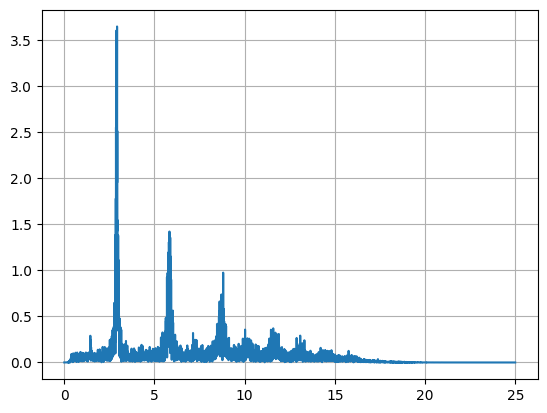

In [ ]:
# Number of sample points
N = len(filtered_data)
# sample spacing
T = 1.0 / 50
yf = fft(filtered_data)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

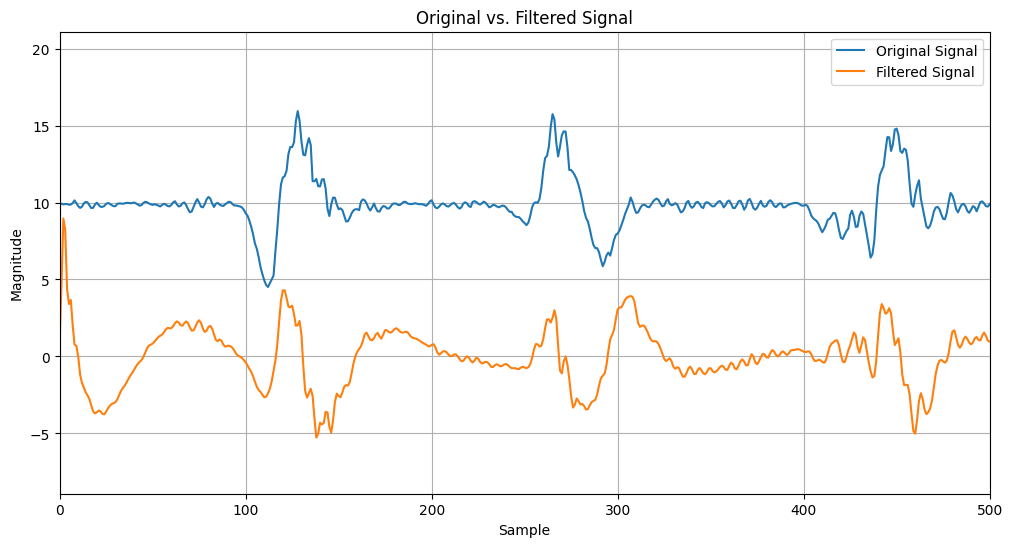

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(signal, label='Original Signal')
plt.plot(filtered_data, label='Filtered Signal')
plt.xlabel('Sample')
plt.ylabel('Magnitude')
plt.title('Original vs. Filtered Signal')
plt.legend()
plt.xlim(0,500)
plt.grid(True)
plt.show()


# Auto

In [ ]:
def calculate_magnitude(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)

from scipy.signal import butter, lfilter
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

def cleaning101(data,filename):
    df = data.copy()
    x = np.array(df['x'].values)
    y = np.array(df['y'].values)
    z = np.array(df['z'].values)
    magnitude = calculate_magnitude(x, y, z)
    df['magnitude'] = magnitude

    fs = 50  # Sampling frequency
    lowcut = 0.4  # Lower cutoff frequency (Hz)
    highcut = 15  # Upper cutoff frequency (Hz)
    signal = np.array(df['magnitude'])

    filtered_data = bandpass_filter(signal, lowcut, highcut, fs)
    df['filtered_magnitude'] = filtered_data
    df.to_csv(filename, index=False)
    return df

In [ ]:
data = [climbing,descending,nothing1,nothing2,running,sitting,walking]
filename = ['climbing_stairs.csv','descending_stairs.csv','nothing1.csv','nothing2.csv','running.csv','sitting_standing_transition.csv','walking.csv']
for i in range(len(data)):
  df = cleaning101(data[i],filename[i])

# Step 4 windowing + stft

In [4]:
def segment_and_flatten_magnitude(df, label=None, magnitude_column_name='filtered_magnitude', window_size_sec=5, overlap=0.5):
        """
        1) Combine x, y, z signals into a single magnitude signal.
        2) Segment the magnitude signal into windows of window_size_sec seconds
        with the specified overlap.
        3) Flatten each window into columns: start_time, x1, x2, ..., xN
        (where N = window_size_sec * sampling_rate).

        Parameters:
            df (pd.DataFrame): DataFrame containing columns 'time', 'x', 'y', 'z'.
                            'time' is in milliseconds.
            magnitude_column_name (string): Target column name that already calculate magnitude.
            window_size_sec (float): Length of each window in seconds (default 5).
            overlap (float): Fraction of window overlap (default 0.5 = 50%).
            sampling_rate (int): Sampling rate in Hz (default 50).

        Returns:
            pd.DataFrame: Each row corresponds to a flattened window.
                        Columns:
                        - 'start_time': millisecond timestamp of the window start
                        - 'x1', 'x2', ..., 'xN': magnitude values for each sample
        """
        # Sort by time to ensure chronological order
        df = df.sort_values(by='time').reset_index(drop=True)

        # 1) Compute magnitude for each row
        if not magnitude_column_name:
            df['magnitude'] = calculate_magnitude(df['x'], df['y'], df['z'])
        sampling_rate = 50
        # 2) Calculate number of samples per window and step size
        window_samples = int(window_size_sec * sampling_rate)  # e.g., 5s * 50Hz = 250
        step_size = int(window_samples * (1 - overlap))        # e.g., 250 * 0.5 = 125

        flattened_rows = []

        # 3) Loop through data with the given step size
        for start_idx in range(0, len(df) - window_samples + 1, step_size):
            # Extract this window of magnitude values
            window = df.iloc[start_idx : start_idx + window_samples].reset_index(drop=True)

            # Prepare a dict for one flattened row
            row_dict = {}
            row_dict['start_time'] = window.loc[0, 'time']
            row_dict['label'] = label

            # Flatten magnitude into x1, x2, x3, ..., xN
            for i in range(window_samples):
                if magnitude_column_name:
                    row_dict[f'x{i+1}'] = window.loc[i, magnitude_column_name]
                else:
                    row_dict[f'x{i+1}'] = window.loc[i, 'magnitude']

            flattened_rows.append(row_dict)

        # Convert list of dicts into a DataFrame
        return pd.DataFrame(flattened_rows)

In [ ]:
temp = climbing.copy()

In [ ]:
win_temp = segment_and_flatten_magnitude(temp)

In [ ]:
win_temp.drop('label',axis=1,inplace=True)
win_temp.drop('start_time',axis=1,inplace=True)
win_temp

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x241,x242,x243,x244,x245,x246,x247,x248,x249,x250
0,0.912149,4.518634,8.814955,8.630282,5.288359,4.011959,3.647809,1.826937,0.410129,-0.173412,...,1.296013,2.379640,3.407289,3.290181,2.012651,1.140668,1.054773,-0.026875,-2.012366,-2.858709
1,-0.154693,-0.422019,-0.287418,0.630866,2.061853,3.024049,2.270232,0.517865,0.100530,0.185156,...,-1.254249,-1.456354,-1.573313,-1.618549,-1.647245,-1.610377,-1.276889,-0.667780,-0.146383,0.159785
2,-2.713705,-2.613799,-2.088723,-1.234391,-1.000501,-1.330738,-1.649261,-1.751111,-1.590438,-1.257473,...,3.357195,3.530154,2.653773,1.770236,1.177078,0.040995,-1.599298,-2.498505,-2.275865,-1.645236
3,0.567342,1.149576,1.425083,1.310764,1.514451,2.301440,2.862636,2.588758,1.985914,1.474178,...,-1.226861,-1.016210,-0.681758,-0.413090,-0.215301,0.005220,0.040969,-0.220511,-0.475741,-0.560232
4,-1.049177,-0.739147,-0.837661,-0.989126,-1.160394,-1.579694,-1.712516,-1.086996,-0.287883,0.062159,...,0.207348,0.434340,0.738176,1.016701,1.062374,0.935044,0.684272,0.463439,0.773058,1.748267
5,-0.537075,-0.399358,-0.205027,-0.046834,0.017476,-0.179774,-0.444707,0.049709,1.661532,3.483001,...,1.950122,3.353547,3.068955,0.482344,-1.437743,-1.960562,-2.354748,-2.472404,-2.016532,-1.779991
6,2.672520,2.697534,2.104770,2.246474,2.762810,1.386538,-1.420257,-2.808037,-2.574358,-2.223022,...,-1.283154,-1.055578,-0.783101,-0.539746,-0.248466,0.200221,0.508349,0.414002,0.291341,0.476022
7,-1.974791,-1.997655,-1.792837,-1.658157,-1.476682,-1.059003,-0.540450,-0.193433,-0.073374,0.030687,...,1.497963,3.989273,6.313695,4.854617,0.515009,-1.370793,-0.080763,0.500757,-0.437401,-1.112882
8,0.707824,0.845585,1.306061,2.299158,3.299923,3.620348,3.169502,2.469724,1.679232,0.381111,...,-1.025419,-1.269613,-1.035920,-0.998692,-0.888583,-0.634107,-0.422300,-0.199808,-0.079733,-0.154228
9,-1.191958,-1.062587,-0.904656,-1.045474,-1.312264,-1.225604,-0.995076,-1.028346,-1.140151,-1.041186,...,-1.694767,-1.797999,-1.771145,-1.438979,-0.868713,-0.274609,0.140628,0.481201,0.887939,1.215627


In [6]:
# prompt: create stft for each row and save output

import librosa
import numpy as np

def calculate_stft_and_save(df, filename):
    # Assuming df has columns like 'x1', 'x2', ..., 'xN' representing the magnitude
    magnitude_data = df.filter(regex='^x').values

    # Calculate STFT for each row
    stft_results = []
    for row in magnitude_data:
        # Convert to float32 as librosa requires it
        row = row.astype(np.float32)
        stft = librosa.stft(row,n_fft=250)
        stft_results.append(stft)

    # Now save the stft_results (replace with your preferred saving method)
    np.save(filename, np.array(stft_results))

    print(f"STFT results for {filename} saved successfully.")
    return np.array(stft_results)

# Example usage (assuming win_temp from the previous code snippet)
# stft_data = calculate_stft_and_save(win_temp, "class1_climbing_backpack.npy")

# You can load it back in with:
# loaded_stft = np.load("sitting_standing_stft.npy")

In [9]:
# [climbing,descending,nothing1,nothing2,running,sitting,walking]
# [backpack,hand,leg,shirtdown,shirtup]
data = [climbing,descending,running,sitting,walking]
filenames = ['class1_climbing_pocket.npy','class2_descending_pocket.npy','class4_running_pocket.npy',
             'class5_sitting_pocket.npy','class6_walking_pocket.npy']
for i in range(len(data)):
  temp = data[i].copy()
  win_temp = segment_and_flatten_magnitude(temp)
  win_temp.drop('label',axis=1,inplace=True)
  win_temp.drop('start_time',axis=1,inplace=True)
  stft_data = calculate_stft_and_save(win_temp, filenames[i])


STFT results for class1_climbing_pocket.npy saved successfully.
STFT results for class2_descending_pocket.npy saved successfully.
STFT results for class4_running_pocket.npy saved successfully.
STFT results for class5_sitting_pocket.npy saved successfully.
STFT results for class6_walking_pocket.npy saved successfully.


----------------------------------------------------------------------------------------------------------------------------

In [ ]:
loaded_stft = np.load("/content/class1_climbing_backpack.npy")

In [ ]:
loaded_stft.shape

(59, 126, 5)

In [ ]:
loaded_stft[0].shape

(126, 5)

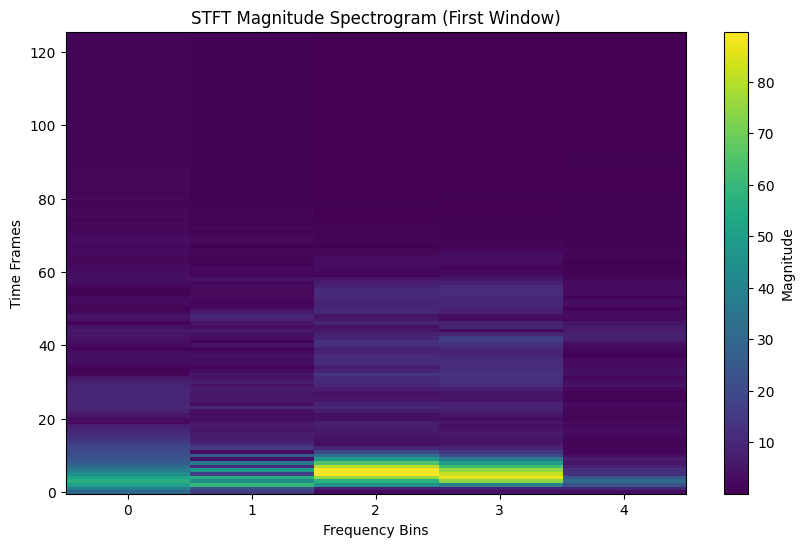

In [ ]:
# prompt: plot loaded_stft

import numpy as np
import matplotlib.pyplot as plt

# Assuming loaded_stft is already loaded as in the provided code

# Plot the magnitude spectrogram of the first STFT result
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(loaded_stft[10]), aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Magnitude')
plt.title('STFT Magnitude Spectrogram (First Window)')
plt.xlabel('Frequency Bins')
plt.ylabel('Time Frames')
plt.show()


# Step 5 something

In [3]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
import os

class STFTDataset(Dataset):
    def __init__(self, data_dir, label_map, transform=None):
        """
        Args:
            data_dir (string): Directory with all the .npy files.
            label_map (dict): A dictionary mapping filenames to labels.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.data_dir = data_dir
        self.file_names = sorted(os.listdir(data_dir)) #sort the file names to keep them in order.
        self.label_map = label_map
        self.transform = transform

    def __len__(self):
        return len(self.file_names)

    def __getitem__(self, idx):
        file_name = self.file_names[idx]
        file_path = os.path.join(self.data_dir, file_name)
        spectrogram = np.load(file_path)
        spectrogram = spectrogram[:40,:,:]

        # Add channel dimension if needed (e.g., grayscale spectrogram)
        if len(spectrogram.shape) == 2:
            spectrogram = np.expand_dims(spectrogram, axis=0) # (1, height, width)

        label = self.label_map[file_name]

        spectrogram = torch.from_numpy(spectrogram).float()
        label = torch.tensor(label).long()

        if self.transform:
            spectrogram = self.transform(spectrogram)

        return spectrogram, label

In [ ]:
spectrogram = np.load('/content/train/spectro_patronum/class1_climbing_backpack.npy')
spectrogram = spectrogram[:40,:,:]
# spectrogram = np.expand_dims(spectrogram, axis=0)
# spectrogram = torch.from_numpy(spectrogram).float()
# spectrogram.shape


array([[[-4.63850451e+00+0.0000000e+00j,  7.35975409e+00+0.0000000e+00j,
         -1.23353422e-01+0.0000000e+00j, ...,
          1.73849316e+01-7.3062825e+00j,  8.02487659e+00-6.7734256e+00j,
          5.95612955e+00+1.6770477e+01j],
        [-2.64798331e+00+9.5927162e+00j,  3.62307692e+00+8.0370760e+00j,
         -1.59787788e+01+1.5858846e+01j, ...,
          5.92739487e+00-7.4704590e+00j, -7.26737690e+00-7.2675714e+00j,
          5.06424809e+00+4.1058202e+00j],
        [ 8.87242198e-01-2.6648295e+00j,  4.20810270e+00+2.1960931e+00j,
         -6.85632801e+00+4.4518404e+00j, ...,
          1.11126713e-02-4.2895584e+00j,  4.00279105e-01+2.2606091e+00j,
         -2.81199121e+00-1.1895411e+00j],
        ...,
        [-2.51454115e+00+2.3513765e+00j,  5.64666176e+00-8.0939941e+00j,
          1.46970773e+00+1.2151764e+01j, ...,
          1.65605307e+00-7.9444364e-02j, -2.05968428e+00-1.0301076e+00j,
          2.91059923e+00+1.4496435e+00j],
        [-4.13521242e+00-2.7928791e+00j,  2.5791518

In [4]:
def create_label_map(data_dir):
    """Creates a dictionary mapping filenames to labels."""
    label_map = {}
    for file_name in os.listdir(data_dir):
        # Example: Extract label from filename (adjust as needed)
        if file_name.startswith("class1"):
            label_map[file_name] = 0
        elif file_name.startswith("class2"):
            label_map[file_name] = 1
        elif file_name.startswith("class3"):
            label_map[file_name] = 2
        elif file_name.startswith("class4"):
            label_map[file_name] = 3
        elif file_name.startswith("class5"):
            label_map[file_name] = 4
        elif file_name.startswith("class6"):
            label_map[file_name] = 5
        # Add more label mappings as needed.
    return label_map

In [ ]:
# Example Usage
data_dir = "/content/train/spectro_patronum"  # Replace with your data directory
label_map = create_label_map(data_dir)

dataset = STFTDataset(data_dir, label_map)
trainloader = DataLoader(dataset, batch_size=32, shuffle=True)


In [ ]:
# Example iteration
for spectrograms, labels in dataloader:
    print("Spectrograms shape:", spectrograms.shape)
    print("Labels shape:", labels.shape)
    print("Labels:", labels)
    break  # Just print the first batch for demonstration
    # Your CNN training code here...

Spectrograms shape: torch.Size([32, 40, 126, 5])
Labels shape: torch.Size([32])
Labels: tensor([5, 3, 1, 4, 0, 4, 3, 1, 0, 2, 5, 0, 4, 5, 1, 2, 2, 3, 2, 2, 1, 5, 5, 4,
        3, 3, 2, 2, 2, 2, 0, 1])


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SpectrogramCNN(nn.Module):
    def __init__(self, num_classes):
        super(SpectrogramCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=5, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 10 * 31, 128) # adjust based on pooling and conv results.
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = x.permute(0, 3, 1, 2)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.reshape(-1, 32 * 10 * 31) #flatten. adjust based on pooling and conv results.
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.softmax(x, dim=1)
        return x

# Example usage:
num_classes = 6 # Replace with your number of classes
model = SpectrogramCNN(num_classes)
input_tensor = torch.randn(32, 40, 126, 5) #creating dummy data, to test the model.
output = model(input_tensor)
print(output.shape)

torch.Size([32, 6])


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

def train(model, dataloader, criterion, optimizer, device, epochs):
    """
    Trains a CNN model.

    Args:
        model (nn.Module): The CNN model to train.
        dataloader (DataLoader): The DataLoader for the training data.
        criterion (nn.Module): The loss function.
        optimizer (optim.Optimizer): The optimizer.
        device (str): 'cuda' or 'cpu'.
        epochs (int): The number of training epochs.
    """

    model.train()  # Set the model to training mode

    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()  # Zero the parameter gradients

            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate the loss
            loss.backward()  # Backward pass
            optimizer.step()  # Optimize

            running_loss += loss.item()

        epoch_loss = running_loss / len(dataloader)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")

    print("Finished Training")

# Example usage (assuming you have a model, dataloader, criterion, optimizer, and device):

model = SpectrogramCNN(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
epochs = 10

train(model, dataloader, criterion, optimizer, device, epochs)

Epoch 1/10, Loss: 12.1209
Epoch 2/10, Loss: 13.2629
Epoch 3/10, Loss: 4.4393
Epoch 4/10, Loss: 1.5384
Epoch 5/10, Loss: 1.0694
Epoch 6/10, Loss: 0.7909
Epoch 7/10, Loss: 1.1022
Epoch 8/10, Loss: 0.7968
Epoch 9/10, Loss: 0.3934
Epoch 10/10, Loss: 0.2632
Finished Training
